In [1]:
import matplotlib as mpl

mpl.use('Agg')
import traceback
from matplotlib.pyplot import *
import matplotlib
import os
import bregnn.io as io
#import bregnn.utils as utils
import sys
import json
from optparse import OptionParser, make_option
sys.path.insert(0, '/users/nchernya/HHbbgg_ETH/bregression/python/')
import datetime
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import probfit
import iminuit
from scipy.stats import norm

from probfit import UnbinnedLH,Normalized,BinnedLH,crystalball
from probfit import gaussian
from iminuit import Minuit
def plot_response(input_dir,names,out_dir):
    plt.ioff()
    matplotlib.rcParams['figure.figsize'] = [10, 10]
    fig1,ax1=plt.subplots()
    fig2,ax2=plt.subplots()
    fig3,ax3=plt.subplots()
    
    for i in range(0,len(input_dir)):
        if i==1:
            end="HuberLoss"
        elif i==0:
            end="mse"
        
        inp_dir=input_dir[i]
        inp_file=names[i]

        data = io.read_data('%s%s'%(inp_dir,inp_file),columns=None)
        print("data read")
        y = (data['genPt']/data['pt']).values.reshape(-1,1)
        X_pt = (data['pt']).values.reshape(-1,1)
        X_eta = (data['scEta']).values.reshape(-1,1)
        #res = (data['resolution_NN_%s'%input_trainings[0]])                                                                           
        print(data.columns)                                                                                                             
        response = (data['scRawEnergy']*data['response']).values.reshape(-1,1)
        response_NN = (data['scRawEnergy']*data['response_NN_'+end]).values.reshape(-1,1)
        response_NN_value = (data['response_NN_'+end]).values.reshape(-1,1)
        gen_energy = (data['genEnergy']).values.reshape(-1,1)

        raw_energy = (data['scRawEnergy']).values.reshape(-1,1)
        #ax1.hist(response,bins=100,label='old_'+end);
        #plt.close()
        ax1.hist(response_NN,bins=100,label='new'+end)
        #plt.close()

        ax3.hist(gen_energy/response_NN,bins=100,range=(0.8,1.2),alpha=0.2,log=False,label='corrected_'+end);
        ax3.hist(gen_energy/raw_energy,bins=100,range=(0.8,1.2),alpha=0.2,log=False,label='raw_'+end);
        #ax3.hist(gen_energy/response,bins=100,range=(0.8,1.2),alpha=0.2,log=False,label='old_'+end);
    
    ax3.legend(loc='upper right');
    ax1.legend(loc='upper right')
    ax1.set_title("histogramm scRawEnergy*response_NN mse/Huberloss")
    ax3.set_title("Histogram gen_energy/responses responses in NN, raw_energy, BDT")
    fig1.show()
    fig3.show()
    fig3.savefig("{}/historical_comparision".format(out_dir,))
    fig1.savefig("{}/response".format(out_dir))
    #fig2.savefig("{}/response_NN".format(out_dir))


In [2]:

def make_plots(x_plot,y_plot,y_err_fit,y_err_sigma,column,end,suffix):
    plt.figure()
    plt.ylim(0.95,1.1)
    plt.title("Profile $response$ vs ${}$, Fit error".format(column))
    plt.ylabel(r"$response$")
    plt.xlabel(r"${}$".format(column))
    plt.errorbar(x_plot,y_plot,y_err_fit,fmt='b.')
    plt.ylim([0.9,1.1])
    plt.savefig("/scratch/kaechb/plots/2018-12-06/testing/Fit_Error_{}response_vs_{}_{}".format(suffix,column,end))
    plt.show()
    plt.close()
    plt.figure()
    plt.title("Profile $response$ vs ${}$, Sigma error".format(column))
    plt.ylabel(r"$response$")
    plt.xlabel(r"${}$".format(column))
    plt.ylim([0.95,1.05])
    plt.errorbar(x_plot,y_plot,y_err_sigma,fmt='b.')
    plt.savefig("/scratch/kaechb/plots/2018-12-06/testing/Sigma_Error_{}response_vs_{}_{}".format(suffix,column,end))
    plt.show()
    plt.close()
 

['/work/kaechb/firstrunMse/', '/work/kaechb/firstrunHuber/']
('/work/kaechb/firstrunMse/', '\n')
/work/kaechb/firstrunMse/applied_res_2019-03-07_Ntup_10Nov_Photon_training_allvars.hd5
/work/kaechb/firstrunMse/


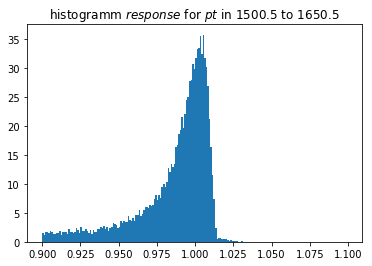

/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:108: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:108: InitialParamWarning: Parameter sigma is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:109: SmallIntegralWarning: (1.0050000000000001, -0.002159419004577924)


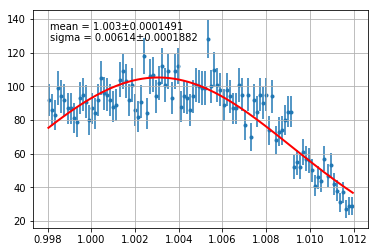

/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:138: InitialParamWarning: Parameter alpha is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:138: InitialParamWarning: Parameter alpha2 is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:138: InitialParamWarning: Parameter n is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:138: InitialParamWarning: Parameter n2 is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:139: SmallIntegralWarning: (0.08092462166805814, 1.6741956341879984, -379.11953516599084, 3.182260504918869, 1.0030556146374476, 0.006140319348567558)


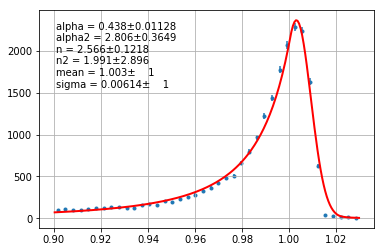

/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter alpha is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter alpha2 is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter n is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter n2 is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ip

FCN = 185.770011872 
 TOTAL NCALL = 111 
 NCALLS = 100 
 
 
 EDM = 2449.70756681 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,alpha,0.437344,0.00434711,,,,,No
1,alpha2,2.82623,1.13471,,,,,No
2,n,2.55467,0.0444716,,,,,No
3,n2,1.98076,22.5753,,,,,No
4,mean,1.00256,5.07279e-05,,,,,No
5,sigma,0.00556092,0.000123584,,,,,No


2:


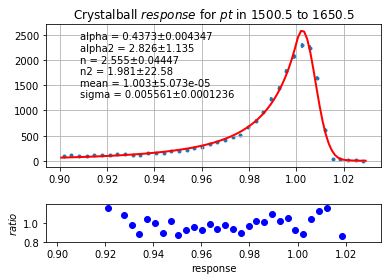

[array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        , 1628.08288574,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])]


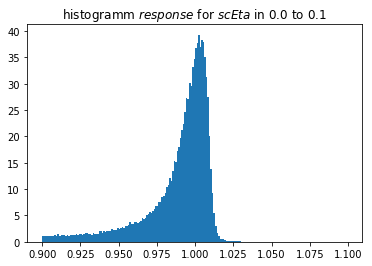

/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:108: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:108: InitialParamWarning: Parameter sigma is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:109: SmallIntegralWarning: (1.002, -0.0009922551345719344)


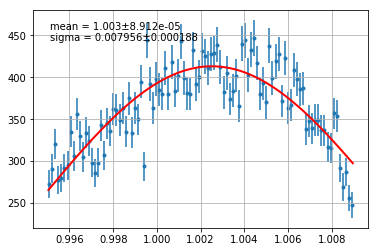

/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:138: InitialParamWarning: Parameter alpha is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:138: InitialParamWarning: Parameter alpha2 is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:138: InitialParamWarning: Parameter n is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:138: InitialParamWarning: Parameter n2 is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:139: SmallIntegralWarning: (0.5419145615034363, 1.6776550994877673, -0.5691581456302486, 3.1980868405609453, 1.002516504685495, 0.007955562555695565)


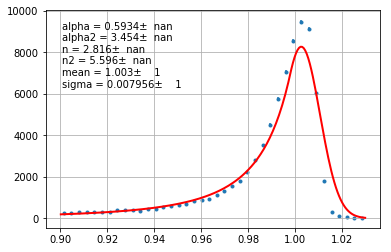

/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter alpha is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter alpha2 is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter n is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter n2 is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ip

FCN = 1021.08878121 
 TOTAL NCALL = 184 
 NCALLS = 173 
 
 
 EDM = 2222.70992139 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,alpha,0.428185,0.00861287,,,,,No
1,alpha2,2.38941,0.0718927,,,,,No
2,n,3.42862,0.0643389,,,,,No
3,n2,4.81595,1.34849,,,,,No
4,mean,1.00292,7.76923e-05,,,,,No
5,sigma,0.00579153,7.90828e-05,,,,,No


2:


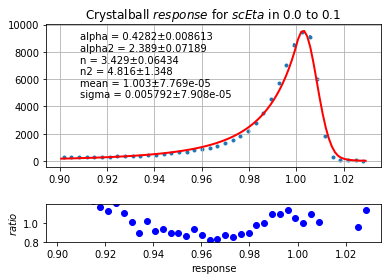

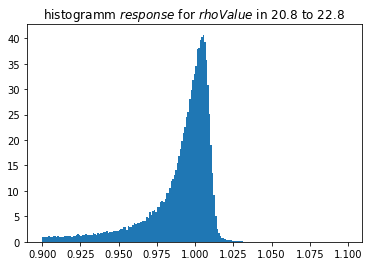

/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:108: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:108: InitialParamWarning: Parameter sigma is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:109: SmallIntegralWarning: (1.0050000000000001, -0.052443254652797325)


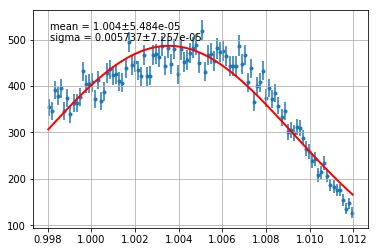

/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:138: InitialParamWarning: Parameter alpha is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:138: InitialParamWarning: Parameter alpha2 is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:138: InitialParamWarning: Parameter n is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:138: InitialParamWarning: Parameter n2 is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:139: SmallIntegralWarning: (0.324368763555533, 1.668386897420149, -2.825326518824351, 3.1706325440983605, 1.0035500749360307, 0.005737198182439511)


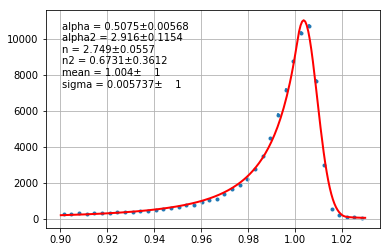

/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter alpha is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter alpha2 is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter n is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter n2 is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:154: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ip

FCN = 260.913215255 
 TOTAL NCALL = 268 
 NCALLS = 268 
 
 
 EDM = 5.73515577832e-08 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,alpha,0.422152,0.00848927,,,,,No
1,alpha2,2.62494,0.0764537,,,,,No
2,n,2.82183,0.0615794,,,,,No
3,n2,1.09341,0.245686,,,,,No
4,mean,1.00414,7.49541e-05,,,,,No
5,sigma,0.00462664,5.2082e-05,,,,,No


2:


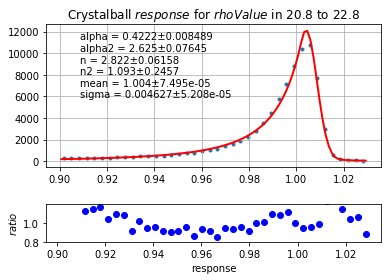

pt






0
scEta






0
rhoValue






0


In [88]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
from probfit.pdf import doublecrystalball
from probfit.plotting import draw_normed_pdf
InteractiveShell.ast_node_interactivity = "last_expr"
input_dir=[]
names=[]
for dire in os.listdir("/work/kaechb/"):
    if  os.path.isdir("/work/kaechb/"+dire):
        for file in os.listdir("/work/kaechb/"+"/"+dire):
        #for file in os.listdir(sys.argv[1]):
            if file.find('.hd')!=-1 and file.find('applied')!=-1:
                
                input_dir.append(["/work/kaechb/"+dire+"/"][0])
                names.append(file)

print(input_dir)
#input_dir=[sys.argv[1]]
#print(len(input_dir))
#print(input_dir)
#for i in range(0,len(names)):
#plot_response(input_dir,names,"/scratch/kaechb/overlapped/")
plt.show()  
inp_dir=input_dir
out_dir="/scratch/kaechb/"
end="applied_"

pt_y=[]
pt_x=[]
pt_ef=[]
pt_es=[]
scEta_x=[]
scEta_y=[]
scEta_ef=[]
scEta_es=[]

rhoValue_x=[]
rhoValue_y=[]
rhoValue_ef=[]
rhoValue_es=[]

for k in range(0,1):
    inp_dir=input_dir[0]
    inp_file=names[0]
    print(inp_dir,"\n")
    print('%s%s'%(inp_dir,inp_file))

    print(inp_dir)
    original_df=io.read_data('%s%s'%(inp_dir,inp_file),columns=None)
    for column in ['pt','scEta','rhoValue']:#
        lower_bound=0.4
        upper_bound=1.2
        amountbins=20
        suffix='NN'
        y_plot=np.zeros(amountbins)
        x_plot=np.zeros(amountbins)
        y_err_fit=np.zeros(amountbins)
        y_err_sigma=np.zeros(amountbins)
        df=original_df.copy()

        df.loc[:,'response']=np.reciprocal(df.loc[:,'response'].values)
        df=df[df['response']>lower_bound]
        df=df[df['response']<upper_bound]
        if column=='pt':
            df=df[df[column]<3000]
        df.loc[:,column]=df[abs(df[column]-df[column].mean())<3*df[column].std()][column] #outlier fuck up binning otherwise
        notused,bins=pd.cut(df[column],amountbins, retbins=True)   

        for i in range(0,len(bins)-1):
            try:
                if (i<10) or (i>10):
                    continue
                #selecting data in bin
                df_temp=df[df[column] >=bins[i]]
                df_temp=df_temp[df_temp[column]<=bins[i+1]]
                data=df_temp.loc[:,'response'].astype(float).values 



                #900 bins for gauss, equidistant
                n,bins_gauss,patches=plt.hist(data,bins=[j*0.001 for j in range(900,1100)],normed=True)
                plt.title("histogramm $response$ for ${}$ in {} to {}".format(column,int(10*bins[i])/10.,int(10*bins[i+1])/10.))
                if np.sum(n) ==0:
                    continue
                #plt.savefig("/scratch/kaechb/plots/2018-12-06/testing/Histogramm{}_{}_{}_{}".format(column,suffix,i,end)) 
                plt.savefig("/scratch/kaechb/Histogramm{}_{}_{}_{}".format(column,suffix,i,end)) 
                plt.show()





                # set the boudaryof the fit 

                n_max=np.argmax(n)
                bound_gauss=[bins_gauss[n_max-7],bins_gauss[n_max+7]]#centered around the max
                #bound_gauss=[.99,1.03]#centered around the max
                #maybe smooth the line by averaging n of 5 neighbors for a more reliant argmax 
                # always remember to normalize the pdf in the boundary
                normalized_gaussian = probfit.Normalized(probfit.gaussian, bound_gauss)
                # build the likelihood with the previous bound
                binned_likelihood = probfit.BinnedLH(normalized_gaussian, data, bins=100, bound=bound_gauss)
                pars_gauss = dict(mean  = bins_gauss[np.argmax(n)],
                                  sigma = 0.05,
                                  limit_mean=(0.98,1.03)) 

                # do the fit
                minuit = iminuit.Minuit(binned_likelihood,print_level=0, **pars_gauss)
                minuit.migrad()      

                # print results


                # get the fit values to be used as imput later
                mean_gauss  = minuit.values[0]
                sigma_gauss = minuit.values[1]
                # print mu_gauss, sigma_gauss
                if sigma_gauss==0:
                    sigma_gauss==0.05
                # plot the results
                binned_likelihood.draw(minuit)
                plt.show()
                #plt.show()
                #bound_cb=[.97, mean_gauss+3*sigma_gauss]
                bound_cb=[.9, 1.03]

                normalized_crystalball = probfit.Normalized(probfit.pdf.doublecrystalball, bound_cb)

                # build the likelihood with the previous boun
                binned_likelihood   = probfit.BinnedLH(normalized_crystalball, data, bins=40, bound=bound_cb)
                pars_cb = dict(mean  = mean_gauss,  
                               sigma = sigma_gauss,
                               fix_mean=True,
                               fix_sigma=True,
                               alpha=.95,alpha2=1.03, n=2.,n2=2
                               )
                
                minuit = iminuit.Minuit(binned_likelihood,print_level=0, **pars_cb)
                minuit.migrad( ) 
                binned_likelihood.draw(minuit)
                plt.show()
                
                
                binned_likelihood   = probfit.BinnedLH(normalized_crystalball, data, bins=40, bound=bound_cb)
                pars_cb = dict(mean  = minuit.values["mean"],  
                               sigma = minuit.values["sigma"],  
      
                               alpha=minuit.values["alpha"],  alpha2=minuit.values["alpha2"], 
                               n=minuit.values["n"],n2=minuit.values["n2"]
            
                               
                               
                               )
                minuit = iminuit.Minuit(binned_likelihood,print_level=1, **pars_cb)
                minuit.migrad( )  
                print("2:")
                (data_edges, datay), (errorp, errorm), (total_pdf_x, total_pdf_y),parts= binned_likelihood.draw(minuit                               ,parmloc=((0.1,0.95)),nfbins=101)

                
              

                
                ax=plt.subplot2grid((6,3),(0,0), rowspan=4,colspan=4)   
                plt.title("Crystalball $response$ for ${}$ in {} to {}".format(column,int(10*bins[i])/10.,int(10*bins[i+1])/10.))


                (data_edges, datay), (errorp, errorm), (total_pdf_x, total_pdf_y),parts=binned_likelihood.draw(minuit,parmloc=((0.1,0.95)),nfbins=101)
                coeff=minuit.args
                data_edges=(data_edges[1:]+data_edges[:-1])/2
                x_plot[i]=df_temp[column].values[np.argmin(df_temp['response'].values-coeff[2])]
                y_plot[i]=coeff[2]
                y_err_fit[i]+=minuit.errors[2]
                y_err_sigma[i]+=coeff[3]
                fit_y=np.zeros(len(datay))
                for k in range(0,len(datay)):
                    fit_y[k]=total_pdf_y[np.argmin(abs(total_pdf_x - data_edges[k]))]
                ratio=datay/fit_y
                plt.subplot2grid((5,3),(4,0),rowspan=2,colspan=4).set_yticks([0.8,1])


                plt.plot(data_edges,ratio,'bo')
                plt.ylabel(r"$ratio$")
                plt.xlabel("response")

                plt.ylim([0.8,1.2])
                #plt.savefig("/work/kaechb/plots/firstrun/testing/{}_{}_{}_{}".format(column,suffix,i,end)) 
                plt.savefig("/scratch/kaechb/{}_{}_{}_{}".format(column,suffix,i,end)) 

                plt.show()
                #plt.close()

            except Exception as e:


                print(traceback.print_exc())
                raise
                print ("erroor")
            if column=='pt':

                pt_x.append(x_plot)
                print(pt_x)
                pt_y.append(y_plot)
                pt_ef.append(y_err_fit)
                pt_es.append(y_err_sigma)
            elif column=='scEta':
                scEta_x.append(x_plot)
                scEta_y.append(y_plot)
                scEta_ef.append(y_err_fit)
                scEta_es.append(y_err_sigma)
            elif column =='rhoValue':
                rhoValue_x.append(x_plot)
                rhoValue_y.append(y_plot)
                rhoValue_ef.append(y_err_fit)
                rhoValue_es.append(y_err_sigma)

for column in ['pt','scEta','rhoValue']:
    print(column)
    if column=='pt':
        xa=pt_x
        ya=pt_y
        xefa=pt_ef
        xesa=pt_es
    elif column=='scEta':
        xa=scEta_x
        ya=scEta_y
        xefa=scEta_ef
        xesa=scEta_es
    else:
        xa=rhoValue_x
        ya=rhoValue_y
        xefa=rhoValue_ef
        xesa=rhoValue_es
    plt.figure()
    plt.ylim([0.98,1.03])
    plt.title("Profile $response$ vs ${}$, Fit error".format(column))
    plt.ylabel(r"$response$")
    plt.xlabel(r"${}$".format(column))
    print("\n"*5)

    for index in range(0,len(xa)):
        print(index)
        plt.errorbar(xa[index],ya[index],yerr=xefa[index],fmt='.',label=str(index))
    plt.legend()        
    plt.savefig("/scratch/kaechb/Fit_Error_{}response_vs_{}".format(suffix,column))

    #plt.savefig("/scratch/kaechb/plots/2018-12-06/all/Fit_Error_{}response_vs_{}".format(suffix,column))
    plt.close()
    plt.figure()
    plt.title("Profile $response$ vs ${}$, Sigma error".format(column))
    plt.ylabel(r"$response$")
    plt.xlabel(r"${}$".format(column))
    plt.ylim([0.98,1.03])

    for index in range(0,len(xa)):
        plt.errorbar(xa[index],ya[index],yerr=xesa[index],fmt='.',label=index)
    plt.savefig("/scratch/kaechb/Sigma_Error_{}response_vs_{}".format(suffix,column))

    #plt.savefig("/scratch/kaechb/plots/2018-12-06/all/Sigma_Error_{}response_vs_{}".format(suffix,column))
    plt.close()


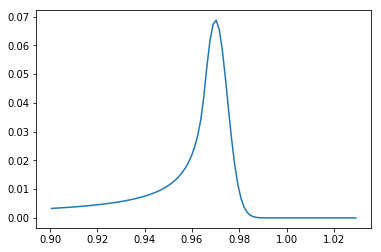

In [97]:
 arg = dict(alpha=.95,alpha2=1.98, n=1.,n2=.2
            , mean=.97, sigma=.005)
                
bound = (.9, 1.03)
plt.figure()
draw_normed_pdf(crystalball, arg=arg, bound=bound, label=str(arg), density=True)
plt.show()

In [ ]:
np.argmax(pd.Series(data).value_counts(bins=100).sort_index().value